In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
# Import the rdatasets package
from rdatasets import data as rdata

In [2]:
data = sm.datasets.get_rdataset("mtcars", "datasets").data

# Display the info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB
None


In [3]:
# Define variables
X = sm.add_constant(data['hp'])  # Add constant for intercept
y = data['mpg']

# Ensure that x and y have consistent dimensions.
print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (32, 2), y shape: (32,)


In [4]:
# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary to verify the model's parameters.

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     45.46
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           1.79e-07
Time:                        18:20:52   Log-Likelihood:                -87.619
No. Observations:                  32   AIC:                             179.2
Df Residuals:                      30   BIC:                             182.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0989      1.634     18.421      0.0

### Perfomr Hyphotesis Test for the slope

In [5]:
# Extract slope and related statistics
slope = model.params['hp']
std_error = model.bse['hp']
t_statistic = model.tvalues['hp']
p_value = model.pvalues['hp']

print(f"Slope (b1): {slope}")
print(f"Standard Error: {std_error}")
print(f"t-Statistic: {t_statistic}")
print(f"p-Value: {p_value}")

Slope (b1): -0.06822827807156367
Standard Error: 0.01011930381042277
t-Statistic: -6.742388542706792
p-Value: 1.7878352541210553e-07


The null hypothesis is H0 : b1 = 0

p-value less than suggests that the slope is statistically significant.

## Practice 1

### Confidence Interval for Slope

In [21]:
# Calculate confidence interval
conf_int = model.conf_int(alpha=0.05).loc['hp']
# print(f"95% Confidence Interval for the slope: {conf_int}")
print(f"95% Confidence Interval for the slope: [{conf_int[0]:.4f}, {conf_int[1]:.4f}]")

95% Confidence Interval for the slope: [-0.0889, -0.0476]


The confidence interval provides a range of plausible values for the true slope b1

If the interval does not include 0, the slope is statistically significant.

This interval is basically the range for the value of the coeficient

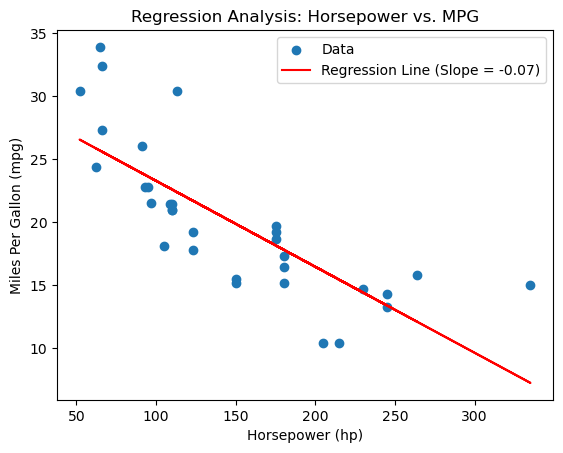

In [7]:
# Predicted values
data['Predicted_mpg'] = model.predict(X)

# Scatterplot with regression line
plt.scatter(data['hp'], data['mpg'], label='Data')
plt.plot(data['hp'], data['Predicted_mpg'], color='red', label=f'Regression Line (Slope = {slope:.2f})')
plt.title('Regression Analysis: Horsepower vs. MPG')
plt.xlabel('Horsepower (hp)')
plt.ylabel('Miles Per Gallon (mpg)')
plt.legend()
plt.show()

## Practice 2

### Confidence Interval for Mean yy Value - Predicting Average

In [8]:
# Define the target horsepower value
target_hp = 150

# Create a DataFrame with the target horsepower and add a constant term
target_X = pd.DataFrame({'hp': [target_hp]})
target_X = sm.add_constant(target_X, has_constant='add')  # Explicitly add constant

# Get the confidence interval for the mean predicted value
mean_prediction = model.get_prediction(target_X).summary_frame(alpha=0.05)
print(mean_prediction[['mean', 'mean_ci_lower', 'mean_ci_upper']])

        mean  mean_ci_lower  mean_ci_upper
0  19.864619      18.468309      21.260928


This interval answers:
👉 "What is the range of likely values for the mean response at this value of X?"

In your case:
We are 95% confident that the average mpg for all cars with this horsepower is between 18.47 and 21.26.

🧠 This interval is narrower because averaging reduces variability.

In [9]:
target_X

,const,hp
0,1.0,150


### Prediction interval for an individual observation

In [10]:
prediction = model.get_prediction(target_X).summary_frame(alpha=0.05)
print(prediction[['mean', 'obs_ci_lower', 'obs_ci_upper']])

        mean  obs_ci_lower  obs_ci_upper
0  19.864619     11.852784     27.876453


Interpretation: The prediction interval accounts for variability in individual cars, resulting in a broader range than the confidence interval.

Important Note: In the Example

1) Confidence Interval for the Mean y Value: The range (18.47 to 21.26) reflects the uncertainty in predicting the average mpg for cars with 150 horsepower.
2) Prediction Interval for a Single y Value: The range (11.85 to 27.88) is much wider because it accounts for the additional variability of an individual car's mpg around the regression line.

This interval answers:
👉 "What is the range of likely values for a new individual car with this horsepower?"

In your case:
We are 95% confident that an individual car with this horsepower would get between 11.85 and 27.88 mpg.

🧠 This interval is wider because it includes:

The uncertainty in estimating the mean

Plus the natural variability of individual outcomes

| Interval Type       | What it Predicts                   | Wider or Narrower? | Interpretation Example               |
| ------------------- | ---------------------------------- | ------------------ | ------------------------------------ |
| Confidence Interval | Mean of the population at that X   | Narrower           | Average mpg for 100 cars with 130 hp |
| Prediction Interval | A single new observation at that X | Wider              | MPG for one new car with 130 hp      |


The confidence interval is narrower because it estimates the mean response, which has less variability compared to individual outcomes. The prediction interval is wider because it incorporates not only the uncertainty in the mean prediction but also the inherent randomness in individual observations. This distinction is always the case and essential in data science for interpreting predictions, whether you are predicting group-level trends (confidence interval) or individual outcomes (prediction interval).

In [11]:
data

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,Predicted_mpg
rownames,,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,22.593750
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,22.593750
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,23.753631
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,22.593750
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,18.158912
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,22.934891
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,13.382932
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,25.868707
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,23.617174


In [16]:
# Step 1: Add constant for full prediction matrix
X_full = sm.add_constant(data['hp'], has_constant='add')

# Step 2: Predict on full dataset
prediction = model.get_prediction(X_full).summary_frame(alpha=0.05)

# Step 3: Assign to each row
data['Predicted_mpg']   = prediction['mean']
data['mean_ci_lower']   = prediction['mean_ci_lower']
data['mean_ci_upper']   = prediction['mean_ci_upper']
data['obs_ci_lower']    = prediction['obs_ci_lower']
data['obs_ci_upper']    = prediction['obs_ci_upper']

In [20]:
data

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,Predicted_mpg,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
rownames,,,,,,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,22.593750,21.006344,24.181156,14.546411,30.641089
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,22.593750,21.006344,24.181156,14.546411,30.641089
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,23.753631,21.971485,25.535776,15.665624,31.841638
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,22.593750,21.006344,24.181156,14.546411,30.641089
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,18.158912,16.646511,19.671313,10.126031,26.191792
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,22.934891,21.295615,24.574168,14.877160,30.992623
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,13.382932,10.918575,15.847289,5.117772,21.648092
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,25.868707,23.630821,28.106594,17.668223,34.069192
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,23.617174,21.860464,25.373884,15.534734,31.699615


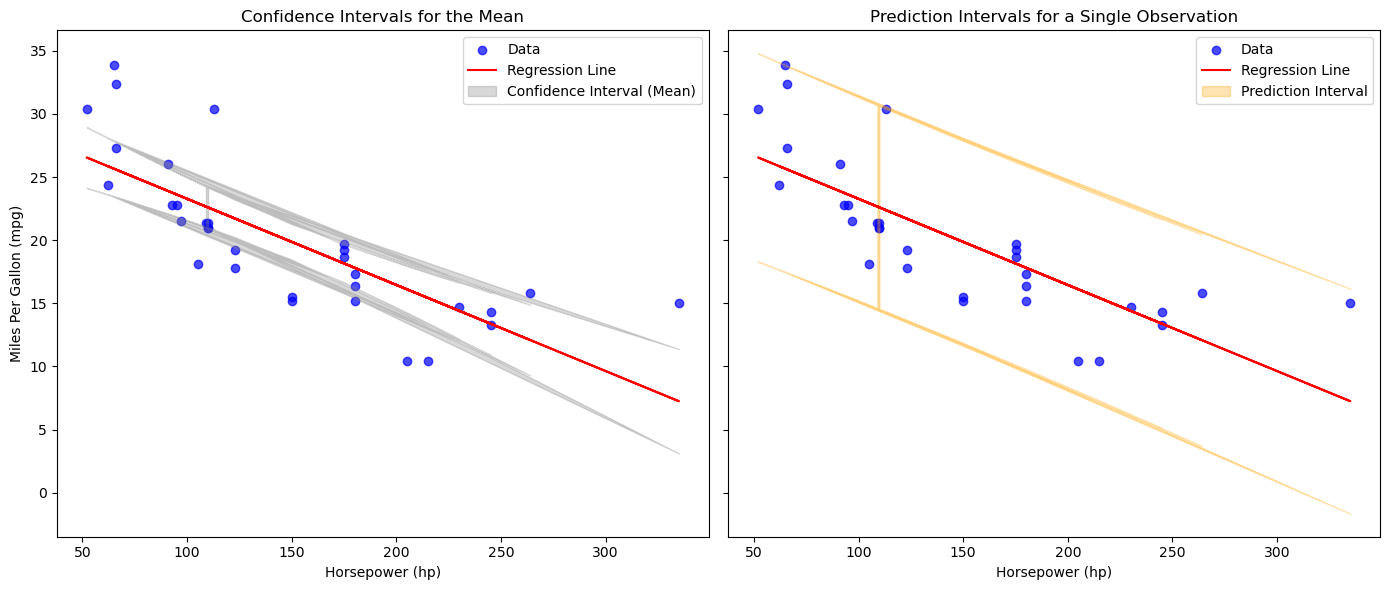

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

#Scatterplot with confidence intervals
axes[0].scatter(data['hp'], data['mpg'], label='Data', color='blue', alpha=0.7)
axes[0].plot(data['hp'], data['Predicted_mpg'], color='red', label='Regression Line')
axes[0].fill_between(data['hp'], data['mean_ci_lower'], data['mean_ci_upper'], color='gray', alpha=0.3, label='Confidence Interval (Mean)')
axes[0].set_title('Confidence Intervals for the Mean')
axes[0].set_xlabel('Horsepower (hp)')
axes[0].set_ylabel('Miles Per Gallon (mpg)')
axes[0].legend()


# Scatterplot with prediction intervals
axes[1].scatter(data['hp'], data['mpg'], label='Data', color='blue', alpha=0.7)
axes[1].plot(data['hp'], data['Predicted_mpg'], color='red', label='Regression Line')
axes[1].fill_between(data['hp'], data['obs_ci_lower'], data['obs_ci_upper'], color='orange', alpha=0.3, label='Prediction Interval')
axes[1].set_title('Prediction Intervals for a Single Observation')
axes[1].set_xlabel('Horsepower (hp)')
axes[1].legend()


plt.tight_layout()
plt.show()